In [24]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("..")

import nidn
import torch
from nidn.fdtd_integration.init_fdtd import _add_boundaries, _add_object, _add_source
from nidn.fdtd import (
    AbsorbingObject,
    AnisotropicObject,
    set_backend,
    Grid,
    PML,
    PeriodicBoundary,
    LineSource,
    LineDetector,
    PointSource,
)
from nidn.fdtd_integration.compute_spectrum_fdtd import _get_abs_value_from_3D_signal
from nidn.utils.global_constants import SPEED_OF_LIGHT
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create simplified FDTD grid and run simulation

In [29]:
eps = torch.tensor(2.0 + 0.1j, requires_grad=True)
source_pos_x = torch.tensor(5.0, requires_grad=True)
grid = Grid((20,5,1),1e-7, permittivity=1.0, permeability=1.0)
_add_boundaries(grid, 5)
_add_source(int(grid,source_pos_x),2,1e-6/SPEED_OF_LIGHT,False,"line" )
_add_object(grid,8,12,eps, SPEED_OF_LIGHT/1e-6)
detector = LineDetector()
grid[13, :, 0] = detector

### Visualize grid

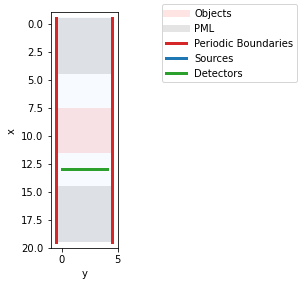

In [30]:
plt.figure()
grid.visualize(z=0)

### Run grid and get detector values

In [27]:
niter = 2
grid.run(niter)

signal = _get_abs_value_from_3D_signal(detector.detector_values()["E"])
signal


  0%|          | 0/2 [00:00<?, ?it/s]


IndexError: index 50000000 is out of bounds for dimension 0 with size 20

### Create loss function

In [ ]:
loss = sum(signal)
loss

tensor(0., grad_fn=<AddBackward0>)

### Run backwards and find gradient of eps

In [ ]:
loss.backward()

In [ ]:
source_pos_x.grad

tensor(0.+0.j)